Importação das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from randomness import generate_column_vector, generate_invertible_matrix, generate_strictly_diagonal_dominant_matrix

# Projeto 1
Implementação dos algoritmos de eliminação gaussiana aprendidos (Jacob e Gauss)

## Questões
### 1ª Questão
#### a ) Implemente os métodos de Jacobi e Gauss-Seidel para resolver o sistema linear $ Ax = b $

Implementando o método de Jacobi:

In [70]:
def jacobi(A: np.ndarray, b: np.ndarray, solution: np.ndarray = None, n: int = 100, atol: float = 1e-6) -> tuple[int, np.ndarray]:
    """This function uses the Jacobi method for computing the solution of the linear system Ax = b.
    Remembering that, if the matrix isn't strictly diagonal, the algorithm may not converge to the solution.
    And the algorithm converges if, and only if, all eigenvalues of A are less then 1 (This function doesn't
    calculate the eigenvalues because it can cost a lot of resources of the computer).

    Args:
        A (np.ndarray): Squared nxn matrix A
        b (np.ndarray): Vector b
        n (int, optional): The amout of times the initial guess will be iterated to converge to the solution. Default to 100
        atol (float, optional): Define the tolerance of the approximation between the algorithm solution and the real solution (if the solution is passed)
        solution (np.ndarray, optional): The result of the system

    Raises:
        ValueError: Raises if A has 0 in its diagonal
        
    Returns:
        tuple[int, np.ndarray]: Returns how many iterations did it take to get the algorithms sollution and the approximation to the solution of the system
    """
    x = np.zeros(shape=(A.shape[1], 1))

    # If the matrix has zeros on its diagonal, it will change the order of lines to make the future
    # D matrix invertible
    A_diag = np.diag(A)
    if 0 in A_diag:
        raise ValueError("A has 0s in its diagonal!")
    
    # Constructing the matrices L, U and D where A = L + D + U
    D = np.diag(np.diag(A))
    U = np.zeros(shape=A.shape)
    L = np.zeros(shape=A.shape)
    for j in range(A.shape[1]):  # I'm going throughout all the columns of A
        U += np.diag(np.diag(A, j+1), j+1)
        L += np.diag(np.diag(A, -(j+1)), -(j+1))
    
    # Creating the M matrix and c vector (M = -D/(L+U), c = D/b)
    inverse_of_D = np.linalg.inv(D)
    M = -inverse_of_D@(L+U)
    c = inverse_of_D@b
    
    # Initializing the algorithm
    for k in range(n):
        x = M @ x + c
        
        if isinstance(solution, np.ndarray):  # If a solution was given
            if (np.isclose(x, solution, atol=atol)).all():  # Check if it iss already next to the solution
                return k, x  # If it is, returns how many iterations did it took and the algorithm's solution
    
    return k, x


Implementando o método de Gauss:

In [71]:
def gauss_seidel(A: np.ndarray, b: np.ndarray, solution: np.ndarray = None, n: int = 100, atol: float = 1e-6) -> tuple[int, np.ndarray]:
    """This function uses the Gauss Seidel method for computing the solution of the linear system Ax = b.
    Remembering that, if the matrix isn't strictly diagonal, the algorithm may not converge to the solution.
    And the algorithm converges if, and only if, all eigenvalues of A are less then 1 (This function doesn't
    calculate the eigenvalues because it can cost a lot of resources of the computer)

    Args:
        A (np.ndarray): Squared nxn matrix A
        b (np.ndarray): Vector b
        n (int, optional): The amout of times the initial guess will be iterated to converge to the solution. Default to 100
        atol (float, optional): Define the tolerance of the approximation between the algorithm solution and the real solution (if the solution is passed)
        solution (np.ndarray, optional): The result of the system

    Raises:
        ValueError: Raises if A has 0 in its diagonal
        
    Returns:
        tuple[int, np.ndarray]: Returns how many iterations did it take to get the algorithms sollution and the approximation to the solution of the system
    """
    x = np.zeros(shape=(A.shape[1], 1))

    # If the matrix has zeros on its diagonal, it will change the order of lines to make the future
    # D matrix invertible
    A_diag = np.diag(A)
    if 0 in A_diag:
        raise ValueError("A has 0s in its diagonal!")
    
    # Constructing the matrices L, U and D where A = L + D + U
    D = np.diag(np.diag(A))
    U = np.zeros(shape=A.shape)
    L = np.zeros(shape=A.shape)
    for j in range(A.shape[1]):  # I'm going throughout all the columns of A
        U += np.diag(np.diag(A, j+1), j+1)
        L += np.diag(np.diag(A, -(j+1)), -(j+1))
    
    # Creating the M matrix
    G = np.linalg.inv(D + L)
    M = -G @ U
    d = G @ b

    for k in range(n):
        x = M @ x + d

        if isinstance(solution, np.ndarray):  # If a solution was given
            if (np.isclose(x, solution, atol=atol)).all():  # Check if it iss already next to the solution
                return k, x  # If it is, returns how many iterations did it took and the algorithm's solution
    
    return k, x


#### b) Teste com matrizes $ 2 × 2 $ e $ 3 × 3 $, e compare graficamente a velocidade de convergência dos dois métodos

In [72]:
SAMPLES = 150
TOTAL_ITERATIONS_FOR_EACH_ALGORITHM = 5000
ABSOLUTE_TOLERANCE = 1e-10

Vamos gerar 1000 matrizes 2x2 e 3x3 para fazer as comparações

[]

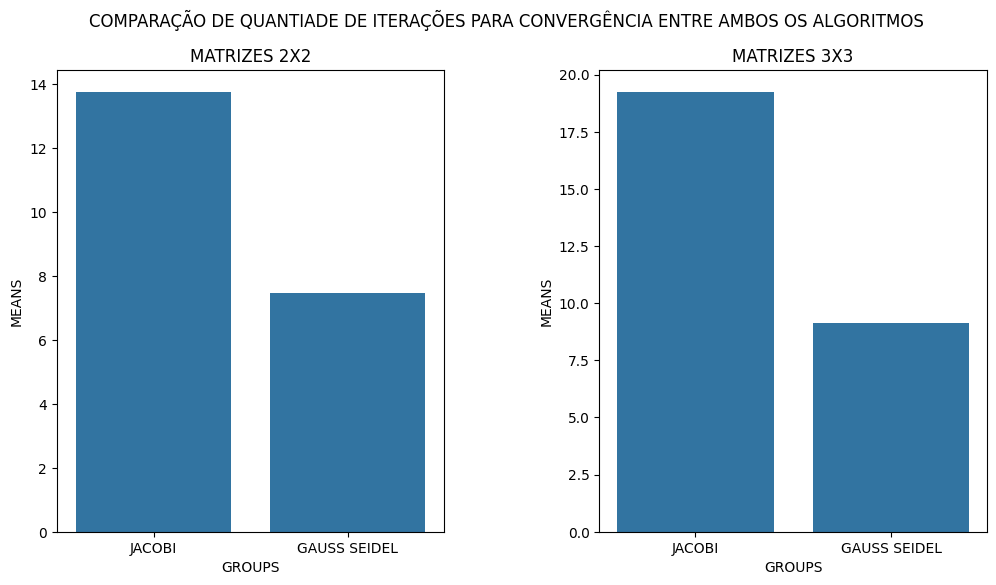

In [73]:
# Generating the matrices
matrices_2x2 = [ generate_strictly_diagonal_dominant_matrix(2) for _ in range(SAMPLES) ]
vectors_2x2 = [ generate_strictly_diagonal_dominant_matrix(2) for _ in range(SAMPLES) ]

matrices_3x3 = [ generate_strictly_diagonal_dominant_matrix(3) for _ in range(SAMPLES) ]
vectors_3x3 = [ generate_strictly_diagonal_dominant_matrix(3) for _ in range(SAMPLES) ]

# Number of iterations for each type of matrix

jacobi_iterations_for_2x2_matrices = []
gauss_iterations_for_2x2_matrices = []

jacobi_iterations_for_3x3_matrices = []
gauss_iterations_for_3x3_matrices = []

# Calculating the solutions for each matrix generated
for k in range(SAMPLES):
    # Calculating the actual solutions
    solution_2x2_system = np.linalg.inv(matrices_2x2[k]) @ vectors_2x2[k]
    solution_3x3_system = np.linalg.inv(matrices_3x3[k]) @ vectors_3x3[k]

    # Calculating the solutions using JACOBI's method
    iter_jacobi_2x2, _ = jacobi(
        matrices_2x2[k],
        vectors_2x2[k],
        solution_2x2_system,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )
    iter_jacobi_3x3, _ = jacobi(
        matrices_3x3[k],
        vectors_3x3[k],
        solution_3x3_system,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )

    # Calculating the solutions using GAUSS-SEIDEL's method
    iter_gauss_2x2, _ = gauss_seidel(
        matrices_2x2[k],
        vectors_2x2[k],
        solution_2x2_system,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )
    iter_gauss_3x3, _ = gauss_seidel(
        matrices_3x3[k],
        vectors_3x3[k],
        solution_3x3_system,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )

    # Adding the informations in the array
    jacobi_iterations_for_2x2_matrices.append(iter_jacobi_2x2)
    jacobi_iterations_for_3x3_matrices.append(iter_jacobi_3x3)

    gauss_iterations_for_2x2_matrices.append(iter_gauss_2x2)
    gauss_iterations_for_3x3_matrices.append(iter_gauss_3x3)

# Making the data
means_2x2 = [ np.mean(jacobi_iterations_for_2x2_matrices), np.mean(gauss_iterations_for_2x2_matrices) ]
means_3x3 = [ np.mean(jacobi_iterations_for_3x3_matrices), np.mean(gauss_iterations_for_3x3_matrices) ]
groups = [ 'JACOBI', 'GAUSS SEIDEL' ]

df_2x2 = pd.DataFrame({ 'GROUPS': groups, 'MEANS': means_2x2 })
df_3x3 = pd.DataFrame({ 'GROUPS': groups, 'MEANS': means_3x3 })

# Plotando as informações
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.suptitle("COMPARAÇÃO DE QUANTIADE DE ITERAÇÕES PARA CONVERGÊNCIA ENTRE AMBOS OS ALGORITMOS")

axes[0].set_title('MATRIZES 2X2')
axes[1].set_title('MATRIZES 3X3')

sns.barplot(data=df_2x2, x='GROUPS', y='MEANS', ax=axes[0])
sns.barplot(data=df_3x3, x='GROUPS', y='MEANS', ax=axes[1])

plt.subplots_adjust(wspace=0.4)

plt.plot()

Agora vamos fazer comparando como os algoritmos convergem conforme aumentamos o tamanho das matrizes

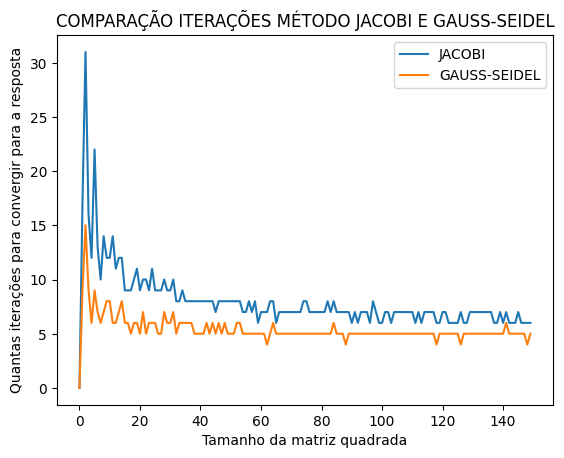

In [74]:
# Generating the matrices that will be used (List where i = 0 have the i+1 x i+1 matrix)
matrices = [ generate_strictly_diagonal_dominant_matrix(k+1) for k in range(SAMPLES) ]
vectors = [ generate_column_vector(k+1) for k in range(SAMPLES) ]

jacobi_time_for_each_matrix = []
gauss_time_for_each_matrix = []

for i in range(SAMPLES):
    solution = np.linalg.inv(matrices[i]) @ vectors[i]  # Calculating the solution

    iterations_jacobi, _ = jacobi(
        matrices[i],
        vectors[i],
        solution,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )  # Testing the JACOBI method
    jacobi_time_for_each_matrix.append(iterations_jacobi)  # Adding the iterations count

    iterations_gauss, _ = gauss_seidel(
        matrices[i],
        vectors[i],
        solution,
        TOTAL_ITERATIONS_FOR_EACH_ALGORITHM,
        ABSOLUTE_TOLERANCE
    )  # Testing the GAUSS SEIDEL method
    gauss_time_for_each_matrix.append(iterations_gauss)  # Adding the iterations count


plt.title("COMPARAÇÃO ITERAÇÕES MÉTODO JACOBI E GAUSS-SEIDEL")
x_axis = [x for x in range(SAMPLES)]

plt.plot(x_axis, jacobi_time_for_each_matrix, label="JACOBI")
plt.plot(x_axis, gauss_time_for_each_matrix, label="GAUSS-SEIDEL")

plt.ylabel('Quantas iterações para convergir para a resposta')
plt.xlabel('Tamanho da matriz quadrada')

plt.legend()
plt.show()


#### c) Compare o erro de Jacobi e Gauss-Seidel para a matriz $ A = \begin{bmatrix} 1 & 2 & -2 \\ 1 & 1 & 1 \\ 2 & 2 & 1 \end{bmatrix} $ e o vetor $ b = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} $

In [75]:
ITERATIONS_COUNT = 100

A = np.array([[1, 2, -2], [1, 1, 1], [2, 2, 1]]).reshape(3, 3)
b = np.array([1, 2, 3]).reshape(-1, 1)

solution = np.linalg.inv(A) @ b

_, x_jacobi = jacobi(A, b)
_, x_gauss = gauss_seidel(A, b)

print("Erro entre a solução de Ax = b com método de Jacobi:")
err_jacobi = solution - x_jacobi
print(err_jacobi)
print(np.sqrt(err_jacobi.T @ err_jacobi))

print("Erro entre a solução de Ax = b com método de Gauss:")
err_gauss = solution - x_gauss
print(err_gauss)
print(np.sqrt(err_gauss.T @ err_gauss))

Erro entre a solução de Ax = b com método de Jacobi:
[[0.]
 [0.]
 [0.]]
[[0.]]
Erro entre a solução de Ax = b com método de Gauss:
[[ 1.86978464e+32]
 [-1.87612289e+32]
 [ 1.26765060e+30]]
[[2.64879074e+32]]


#### d) O que acontece se você somar uma matriz aleatória à matriz $A$ acima? O que acontece se esta perturbação acontecer apenas na diagonal? Ou apenas fora dela?

In [76]:
def test_sum(C):
    """This function is only for reutilizing code, to make the code blocks smaller

    Args:
        C (np.ndarray): The matrix that will be summed to A
    """
    try:
        N = A + C  # New disturbed matrix

        solution = np.linalg.inv(N) @ b

        _, x_jacobi = jacobi(N, b)
        _, x_gauss = gauss_seidel(N, b)

        print("Erro entre a solução de Ax = b com método de Jacobi:")
        err_jacobi = solution - x_jacobi
        print(err_jacobi)
        print(np.sqrt(err_jacobi.T @ err_jacobi))

        print("Erro entre a solução de Ax = b com método de Gauss:")
        err_gauss = solution - x_gauss
        print(err_gauss)
        print(np.sqrt(err_gauss.T @ err_gauss))
    except np.linalg.LinAlgError:
        print("A matriz gerada pela soma da matriz aleatória é SINGULAR")
    except ValueError:
        print("A matriz gerada pela soma possui 0 em sua diagonal")

Vamos primeiro fazer o teste utilizando uma matriz completamente aleatória, sem nenhum tipo de critério

In [77]:
R = np.random.randint(-2, 2, (3, 3))

test_sum(R)

Erro entre a solução de Ax = b com método de Jacobi:
[[-1.70956403e+15]
 [ 1.33301355e+15]
 [-1.93508534e+15]]
[[2.90587157e+15]]
Erro entre a solução de Ax = b com método de Gauss:
[[-3.21299999e+33]
 [-4.65721053e+33]
 [ 3.21299999e+33]]
[[6.50663875e+33]]


Percebemos que o erro varia MUITO, podendo ser muito próximo de 0, quanto podendo explodir a resposta da solução, além de fazer com que gere uma diagonal com 0, o que impossibilita fazer ambos os algoritmos, necessitando efetuar trocas de linhas

Agora, vamos somar uma matriz estritamente predominante na diagonal para ver o que acontece?

In [78]:
D = generate_strictly_diagonal_dominant_matrix(3, -2, 2)

test_sum(D)

Erro entre a solução de Ax = b com método de Jacobi:
[[0.]
 [0.]
 [0.]]
[[0.]]
Erro entre a solução de Ax = b com método de Gauss:
[[ 5.55111512e-17]
 [-5.55111512e-17]
 [ 0.00000000e+00]]
[[7.85046229e-17]]


Como percebemos, os valores se aproximam para 0 da solução, mas porque isso acontece? É bem simples de deduzir que, já que a função gera valores inteiros entre -2 e 2 para a entrada da matriz predominante na diagonal, então a matriz gerada pela soma vai acabar sendo também uma matriz predominante na diagonal, e se eu aumentar o intervalo dos valores possíveis da matriz isso vai ser ainda mais notável:

In [79]:
D = generate_strictly_diagonal_dominant_matrix(3, -20, 20)

test_sum(D)

Erro entre a solução de Ax = b com método de Jacobi:
[[1.38777878e-17]
 [0.00000000e+00]
 [1.38777878e-17]]
[[1.96261557e-17]]
Erro entre a solução de Ax = b com método de Gauss:
[[1.38777878e-17]
 [0.00000000e+00]
 [1.38777878e-17]]
[[1.96261557e-17]]


Vamos testar fazendo os mesmos experimentos, porém, adicionando apenas acima da diagonal

In [80]:
M = np.random.randint(-10, 10, (3, 3))
D = np.diag(np.diag(M))
U = np.zeros(M.shape)
L = np.zeros(M.shape)

for j in range(U.shape[1]):
    U += np.diag(np.diag(M, j+1), j+1)
    L += np.diag(np.diag(M, -(j+1)), -(j+1))

print("================= ADICIONANDO NA DIAGONAL =================")
test_sum(D)

print("================= ADICIONANDO ACIMA DA DIAGONAL =================")
test_sum(U)

print("================= ADICIONANDO ABAIXO DA DIAGONAL =================")
test_sum(L)


================= ADICIONANDO NA DIAGONAL =================
Erro entre a solução de Ax = b com método de Jacobi:
[[0.]
 [0.]
 [0.]]
[[0.]]
Erro entre a solução de Ax = b com método de Gauss:
[[0.]
 [0.]
 [0.]]
[[0.]]
================= ADICIONANDO ACIMA DA DIAGONAL =================
Erro entre a solução de Ax = b com método de Jacobi:
[[ 4.86479049e+68]
 [ 9.27721834e+67]
 [-2.35644210e+68]]
[[5.48449393e+68]]
Erro entre a solução de Ax = b com método de Gauss:
[[-4.68841614e+89]
 [ 3.23339044e+89]
 [ 2.91005139e+89]]
[[6.39565937e+89]]
================= ADICIONANDO ABAIXO DA DIAGONAL =================
Erro entre a solução de Ax = b com método de Jacobi:
[[-2.38098816e+51]
 [-2.35689361e+50]
 [ 3.05493772e+50]]
[[2.41204903e+51]]
Erro entre a solução de Ax = b com método de Gauss:
[[-7.72067100e+163]
 [ 3.39982523e+164]
 [-1.42224146e+165]]
[[inf]]


/tmp/ipykernel_26384/152376997.py:23: RuntimeWarning: overflow encountered in matmul
  print(np.sqrt(err_gauss.T @ err_gauss))


Perceba que varia MUITO, porém, quando pertubamos os valores apenas na diagonal, principalmente para valores grandes, a tendência é que o sistema $(A+D)x = b$ tende a CONVERGIR em ambos os algoritmos, tendo em vista que a chance de ter valores maiores na diagonal é MUITO MAIOR

#### e) O erro no método de Jacobi aplicado à matriz $ A = \begin{bmatrix} 1 & 0 & 1 \\ -1 & 1 & 0 \\ 1 & 2 & -3 \end{bmatrix} $ converge para 0, mas o de Gauss-Seidel mantém o erro constante. Explique o porquê

Dada a matriz $A$, e seja $A = L + U + D$, onde $ L = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 1 & 2 & 0 \end{bmatrix} $, $ U = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix} $ e $ D = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -3 \end{bmatrix} $, então o valor de x na k-ésima iteração de cada algoritmo é:

**Jacobi**:
$$
x_{k+1} = M_jx_k + c
$$

onde $ M_j = -D^{-1}(L+U) $ e $ c = D^{-1}b $

**Gauss**:
$$
x_{k+1} = M_gx_k + d
$$

onde $ M_g = -(D+L)^{-1}U $ e $d = (D+L)^{-1}b$

E temos um teorema que diz que, diz:

Jacobi converte $\Leftrightarrow \lambda(M_j) \lt 1$

Gauss converte $\Leftrightarrow \lambda(M_g) \lt 1$

Vamos então calcular tanto os autovalores de $M_j$ e $M_g$

In [81]:
A = np.array([1, 0, 1, -1, 1, 0, 1, 2, -3]).reshape(3,3)
L = np.zeros(A.shape)
U = np.zeros(A.shape)
D = np.diag(np.diag(A))

for j in range(A.shape[0]):
    U += np.diag(np.diag(A, j+1), j+1)
    L += np.diag(np.diag(A, -(j+1)), -(j+1))

M_j = -np.linalg.inv(D) @ (L+U)
M_g = -np.linalg.inv(D+L) @ U

print("======== Mj ========")
print(M_j)

print("======== Mg ========")
print(M_g)

======== Mj ========
[[ 0.          0.         -1.        ]
 [ 1.          0.          0.        ]
 [ 0.33333333  0.66666667  0.        ]]
======== Mg ========
[[ 0.  0. -1.]
 [ 0.  0. -1.]
 [ 0.  0. -1.]]


Temos então que $M_j = \begin{bmatrix} 0 & 0 & -1 \\ 1 & 0 & 0 \\ \frac{1}{3} & \frac{2}{3} & 0 \end{bmatrix}$, $M_g = \begin{bmatrix} 0 & 0 & -1 \\ 0 & 0 & -1 \\ 0 & 0 & -1 \end{bmatrix}$. E quais são os autovalores de ambas as matrizes?

In [82]:
print("========= AUTOVALORES DE Mj =========")
print(np.linalg.eig(M_j).eigenvalues)

print("========= AUTOVALORES DE Mg =========")
print(np.linalg.eig(M_g).eigenvalues)

========= AUTOVALORES DE Mj =========
[ 0.37370763+0.86735546j  0.37370763-0.86735546j -0.74741525+0.j        ]
========= AUTOVALORES DE Mg =========
[ 0.  0. -1.]


Perceba que os autovalores de $M_g$ não são menores que 1, o que, pelo teorema, faz com que o algoritmo não converge, e ainda mais, como um de seus autovalores é $-1$, o erro não sai do lugar, nem aumenta, nem diminui

#### f) Será que você consegue, a partir da matriz A, construir uma matriz em que o erro do método de Jacobi vai para zero, enquanto que o erro do método de Gauss-Seidel diverge para $+\infty$?

Dada uma matriz $A = L + D + U$ com as mesmas propriedades já citadas nos itens anteriores, temos, novamente, que na (k+1)-ésima iteração, x é igual a:

**Jacobi**:
$$
x_{k+1} = M_jx_k + c
$$

onde $ M_j = -D^{-1}(L+U) $ e $ c = D^{-1}b $

**Gauss**:
$$
x_{k+1} = M_gx_k + d
$$

onde $ M_g = -(D+L)^{-1}U $ e $d = (D+L)^{-1}b$

Dado que $x$ é a solução do sistema, queremos que $\|x - x_{k+1}\| \rightarrow 0$ para Jacobi e $\|x - x_{k+1}\| \rightarrow +\infty$ para Gauss-Seidel, então:

**Jacobi**:
$$
\|x-x_{k+1}\| = \|M_jx - c - (M_jx_k - c)\| = \|M_j(x - x_k)\| \le \|M_j\|\|x - x_k\|
$$
Logo, queremos que $\|M_j\| \lt 1$, então separamos:
$$
\|M_j\| = \|-D^{-1}(L+U)\| \le \|D^{-1}\|\|(L+U)\|
$$
Ou seja, podemos tentar tender a norma de $D^{-1}$ ou de $L+U$ para 0! Vamos ver o que podemos fazer para Gauss-Seidel ir ao infinito e podermos conciliar com o objetivo da questão

**Gauss**:
$$
\|x-x_{k+1}\| = \|M_gx - c - (M_gx_k - c)\| = \|M_g(x - x_k)\| \le \|M_g\|\|x - x_k\|
\\
\|M_g\| = \|-(D+L)^{-1}U\| \le \|(D+L)^{-1}\|\|U\|
$$

A partir disso, podemos obter um insight sobre o que podemos fazer para gerar uma matriz que converge para Jacobi e diverge para Gauss. Vamos analisar! Podemos tender $D$ para valores grandes, pois dessa forma $\|D^{-1}\|_2 \rightarrow 0$, pois:
$$
\|D^{-1}\|_2 = \frac{1}{\sigma_{min}(D)}
$$
Utilizando então da norma 2, podemos fazer isso para fazer Jacobi ir para 0 e, aumentando $U$, podemos fazer com que Gauss possa divergir, porém, se aumentamos $D$, também diminuimos $\|(D+L)^{-1}\|_2$, então temos que aumentar a diagonal de uma forma *"mais lenta"* que aumentamos acima dela. Vamos fazer alguns testes!

Veja abaixo, eu fiz um teste usando $AA^*$, pois a diagonal de uma matriz desse tipo costuma ter valores maiores, pois:
$a_{ii} = \sum_{k=1}^na_{ik}^2$, vamos conferir, mesmo que nem todos os valores da diagonais sejam muito grandes, se tem valores razoavelmente grandes ou muitos valores grandes:

In [83]:
A, A @ A.T

(array([[ 1,  0,  1],
        [-1,  1,  0],
        [ 1,  2, -3]]),
 array([[ 2, -1, -2],
        [-1,  2,  1],
        [-2,  1, 14]]))

Vemos que $AA^*$ tem valor 14 na diagonal e os valores na diagonal não são tão pequenos se comparados às outras entradas, então é razoável utilizar-mos $AA^*$. Conseguimos obter o resultado desejado fazendo a matriz $N = AA^* + 20A$

In [84]:
N = A @ A.T + 20*A

L = np.zeros(N.shape)
U = np.zeros(N.shape)
D = np.diag(np.diag(N))

for j in range(N.shape[0]):
    U += np.diag(np.diag(N, j+1), j+1)
    L += np.diag(np.diag(N, -(j+1)), -(j+1))

M_j = -np.linalg.inv(D) @ (U+L)

H = np.linalg.inv(D+L)
M_g = -H @ U

N

array([[ 22,  -1,  18],
       [-21,  22,   1],
       [ 18,  41, -46]])

In [85]:
print("Módulo dos autovalores de Mj")
for eigenvalue in np.linalg.eig(M_j).eigenvalues:
    print(abs(eigenvalue))

print("Módulo dos autovalores de Mg")
for eigenvalue in np.linalg.eig(M_g).eigenvalues:
    print(abs(eigenvalue))

Módulo dos autovalores de Mj
0.9525189921713721
0.9525189921713721
0.7681203834297978
Módulo dos autovalores de Mg
0.0
0.0007984306848709544
1.0125864058224954


In [86]:
b = np.array([1,2,3]).reshape(-1, 1)
_, x_jacobi = jacobi(N, b, n=1000, atol=1e-10)
_, x_gauss = gauss_seidel(N, b, n=1000, atol=1e-10)

solution = np.linalg.inv(N) @ b

print("====== RESOLVENDO Ax = b ======")
print(solution)

print(x_jacobi)
print(x_gauss)

====== RESOLVENDO Ax = b ======
[[0.01917759]
 [0.10748372]
 [0.03808759]]
[[0.01917759]
 [0.10748372]
 [0.03808759]]
[[-7055.35432518]
 [-7144.34972086]
 [-9128.64600888]]
